In [87]:
import cheetah
import ARESlatticeStage3v1_9 as ares
import numpy as np
import torch
import matplotlib.pyplot as plt
import ocelot as oc
from ocelot.adaptors import astraBeam2particleArray, particleArray2astraBeam
from copy import deepcopy
import scienceplots
import matplotlib

In [11]:
# Load ASTRA no sc result
astra_outbeam_nosc = cheetah.ParticleBeam.from_astra("ares_ea_no_sc.0205.001", device="cpu")

In [2]:
ares_ea_lattice = [
    oc.Drift(l=0.1750 - 0.061),
    oc.Quadrupole(l=0.122, k1=5.0, eid="Q1"), # Centered at 0.1750
    oc.Drift(l=0.4280),
    oc.Quadrupole(l=0.122, k1=-10.0, eid="Q2"), # Centered at 0.7250
    oc.Drift(l=0.4280),
    oc.Quadrupole(l=0.122, k1=5.0, eid="Q3"), # Centered at 1.2750
    oc.Drift(l=0.71),
    oc.Marker()
]


lattice = oc.MagneticLattice(ares_ea_lattice)
# p_array = astraBeam2particleArray("ACHIP_EA1_2021.1351.001")
p_array = astraBeam2particleArray("test_smallbeam.001")

navi = oc.Navigator(lattice)
# navi.unit_step = lattice.totalLen
_, p_array_out = oc.track(lattice, deepcopy(p_array), navi, print_progress=False)

ocelot_outbeam_nosc = cheetah.ParticleBeam.from_ocelot(p_array_out)

Astra to Ocelot: charge =  5.0000000000007985e-14  C
Astra to Ocelot: particles number =  10000
Astra to Ocelot: energy =  0.10731590244355117  GeV
Astra to Ocelot: s pos =  0.0  m


In [3]:
# 
segment = cheetah.Segment.from_ocelot(ares_ea_lattice, warnings=False)

# particle_beam = cheetah.ParticleBeam.from_astra("ACHIP_EA1_2021.1351.001", device="cpu")
particle_beam = cheetah.ParticleBeam.from_astra("test_smallbeam.001", device="cpu")
cheetah_outbeam = segment.track(particle_beam)

In [4]:
segment

Segment(elements=ModuleList(
  (0): Drift(length=tensor(0.1140))
  (1): Quadrupole(length=tensor(0.1220), k1=tensor(5.), misalignment=tensor([0., 0.]), tilt=tensor(0.), name='Q1')
  (2): Drift(length=tensor(0.4280))
  (3): Quadrupole(length=tensor(0.1220), k1=tensor(-10.), misalignment=tensor([0., 0.]), tilt=tensor(0.), name='Q2')
  (4): Drift(length=tensor(0.4280))
  (5): Quadrupole(length=tensor(0.1220), k1=tensor(5.), misalignment=tensor([0., 0.]), tilt=tensor(0.), name='Q3')
  (6): Drift(length=tensor(0.7100))
  (7): Marker(name='ID_69785179_')
), name='unnamed_element_0')

In [5]:
# astra_outbeam_nosc = cheetah.ParticleBeam.from_astra("../astra/ares_ea_no_sc.0205.001", device="cpu")
astra_outbeam_nosc = cheetah.ParticleBeam.from_astra("ares_ea_no_sc.0205.001", device="cpu")

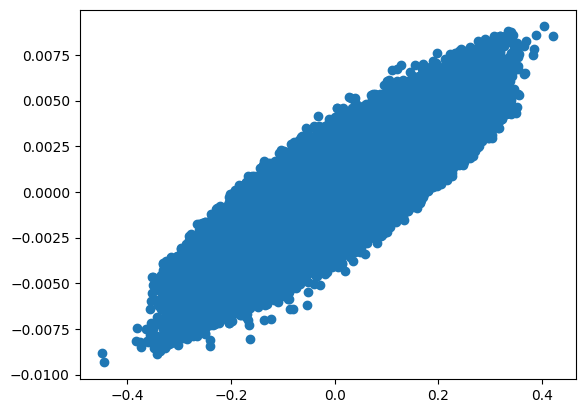

In [6]:
plt.scatter(particle_beam.xs * 1e3, particle_beam.xps * 1e3)

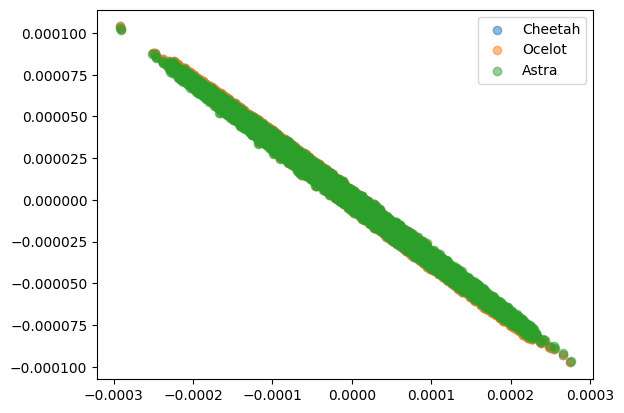

In [7]:
plt.scatter(cheetah_outbeam.xs, cheetah_outbeam.xps, alpha=0.5, label="Cheetah")

plt.scatter(ocelot_outbeam_nosc.xs, ocelot_outbeam_nosc.xps,alpha=0.5, label="Ocelot")
plt.scatter(astra_outbeam_nosc.xs, astra_outbeam_nosc.xps,alpha=0.5, label="Astra")
plt.legend()

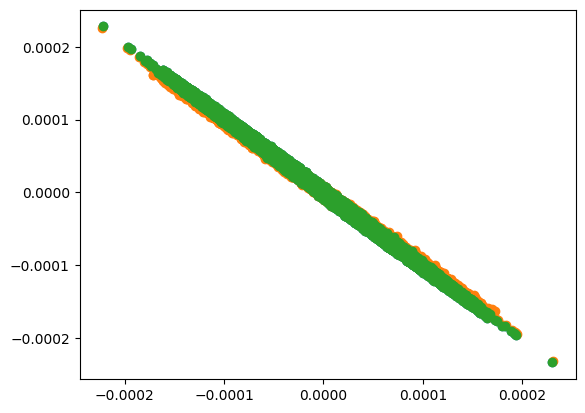

In [9]:
plt.scatter(cheetah_outbeam.ys, cheetah_outbeam.yps)
plt.scatter(astra_outbeam_nosc.ys, astra_outbeam_nosc.yps)
plt.scatter(ocelot_outbeam_nosc.ys, ocelot_outbeam_nosc.yps)
# plt.scatter(astra_outbeam_nosc.ys, astra_outbeam_nosc.yps)

## Look at stranger beam distribution

In [221]:
parray_in = astraBeam2particleArray("ACHIP_EA1_2021.1351.001").thin_out(2)
# Generate some weird pattern
# invert the sign of x for every other particle
parray_in.rparticles[0,::2] *= -1
parray_in.q_array = np.ones_like(parray_in.q_array) * 5e-12 / len(parray_in.q_array)
# Set long position to 0.0
parray_in.s = 0.0 

Astra to Ocelot: charge =  5.000000000001694e-13  C
Astra to Ocelot: particles number =  100000
Astra to Ocelot: energy =  0.10731590244355117  GeV
Astra to Ocelot: s pos =  13.50890653269  m


In [223]:
# Save to astra file
# particleArray2astraBeam(parray_in, "interesting_initial_beam.001")

In [224]:
# os.system("./Astra ares_ea_fun_beam.in")  # Run Astra simulation
# os.system("./Astra ares_ea_fun_beam_nosc.in")  # Run Astra simulation with no space charge
astra_outbeam = cheetah.ParticleBeam.from_astra("ares_ea_fun_beam.0205.001", device="cpu")
astra_outbeam_nosc = cheetah.ParticleBeam.from_astra("ares_ea_fun_beam_nosc.0205.001", device="cpu")

In [225]:
parray_in = astraBeam2particleArray("interesting_initial_beam.001")

Astra to Ocelot: charge =  5.000000000004141e-12  C
Astra to Ocelot: particles number =  50000
Astra to Ocelot: energy =  0.10731590244355117  GeV
Astra to Ocelot: s pos =  0.0  m


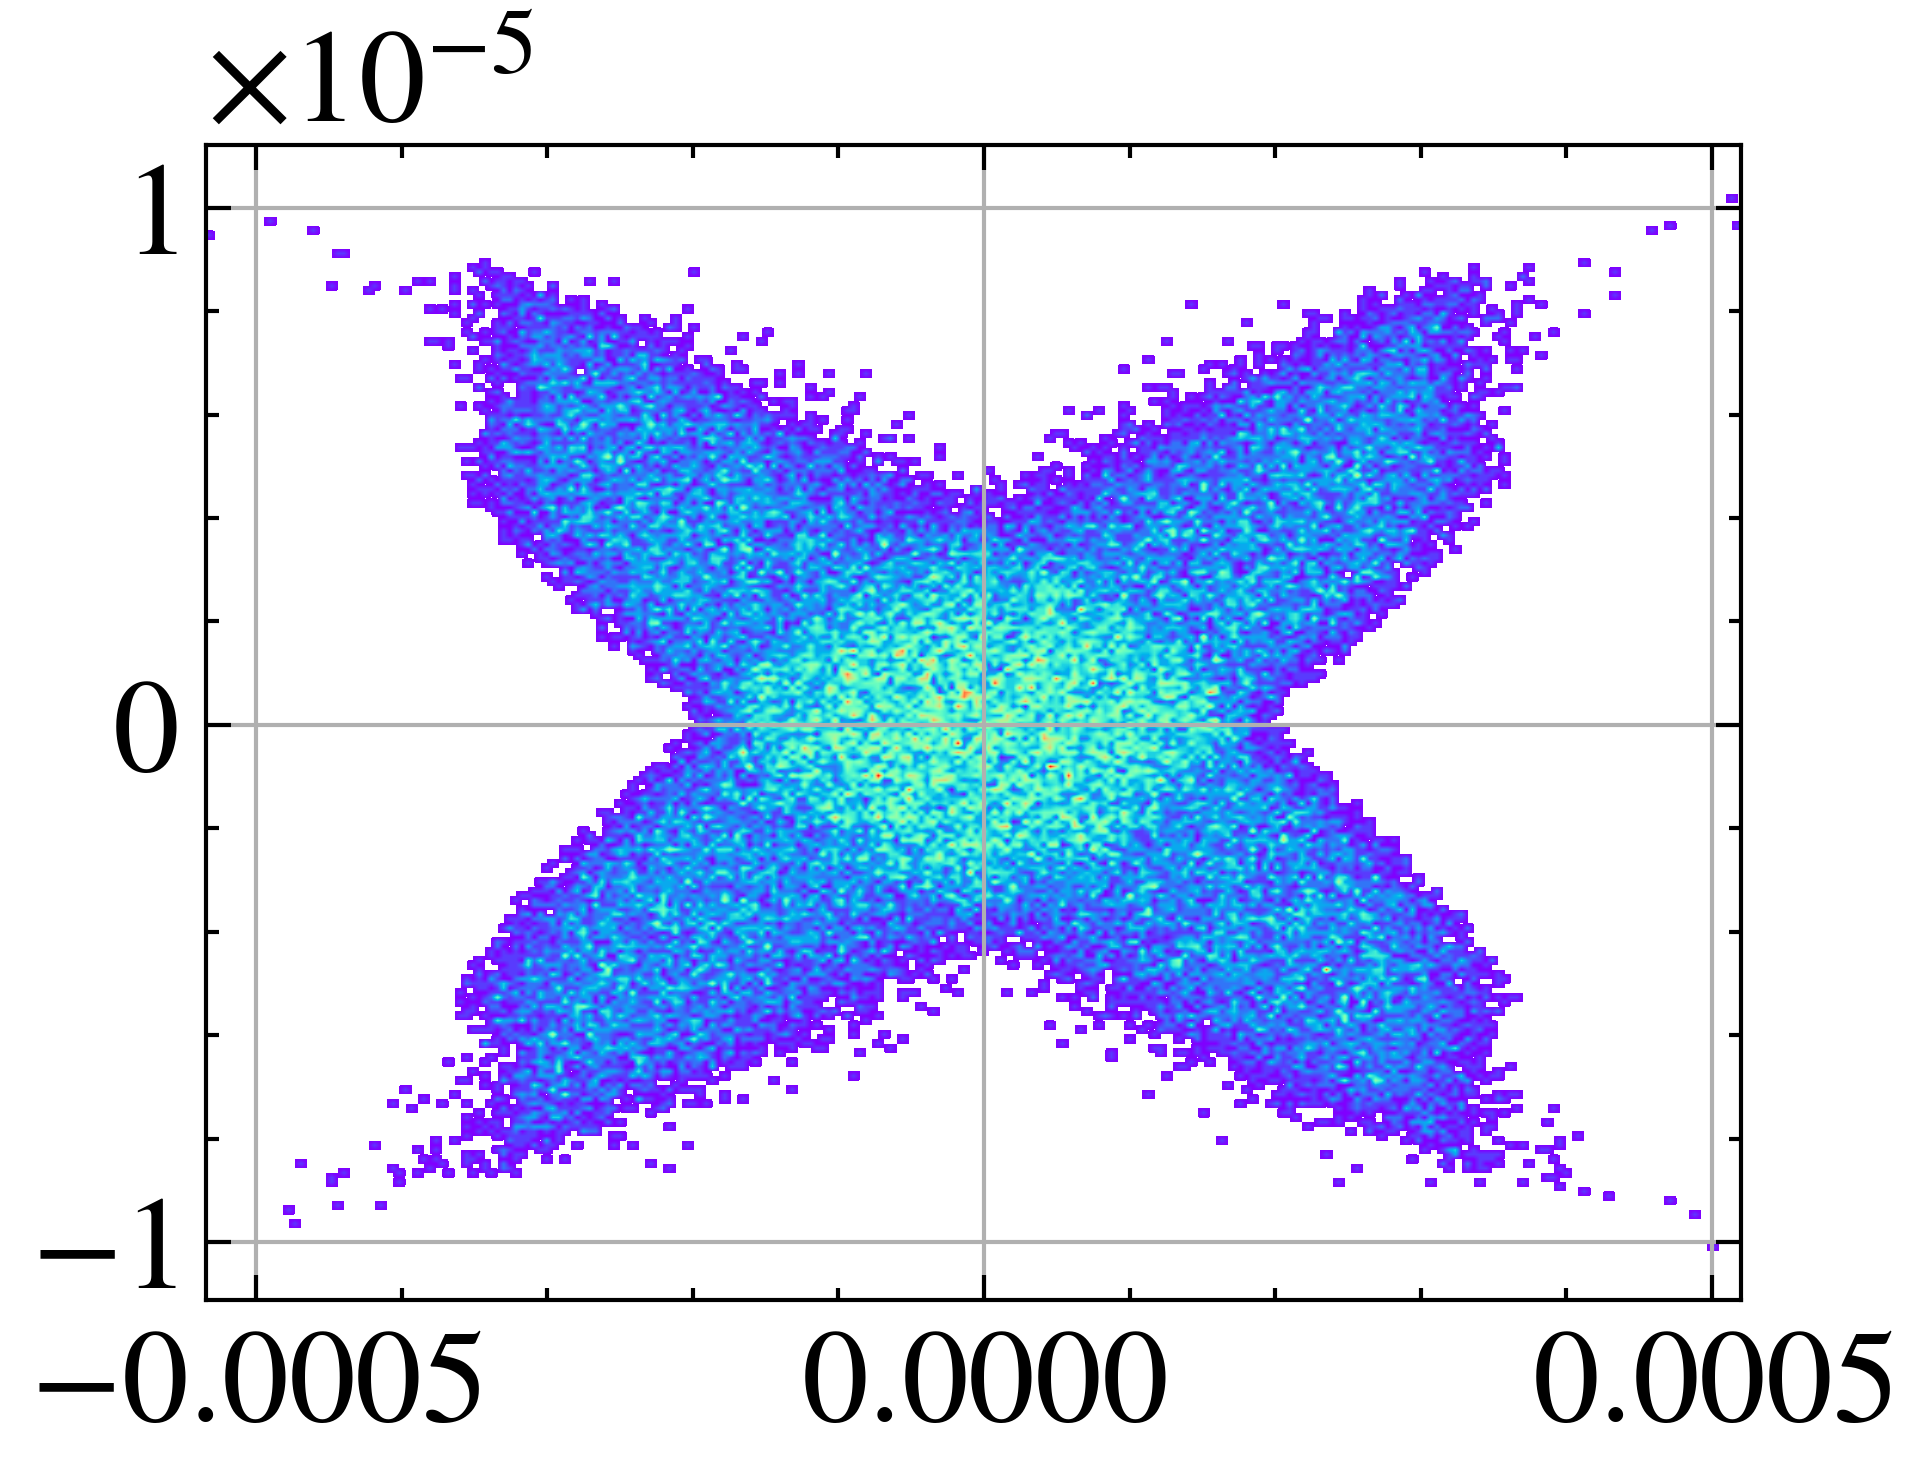

In [226]:
from ocelot.gui.accelerator import show_density
show_density(parray_in.x(), parray_in.px())

In [227]:
cheetah_inbeam = cheetah.ParticleBeam.from_ocelot(parray_in)

cheetah_outbeam = segment.track(cheetah_inbeam)

In [228]:
# navi = oc.Navigator(lattice)
# # navi.unit_step = lattice.totalLen
# _, p_array_out = oc.track(lattice, deepcopy(parray_in), navi, print_progress=False)

# ocelot_outbeam_nosc = cheetah.ParticleBeam.from_ocelot(p_array_out)

In [229]:
# navi = oc.Navigator(lattice)
# sc = oc.SpaceCharge()
# navi.add_physics_proc(sc, lattice.sequence[0], lattice.sequence[-1])
# # navi.unit_step = lattice.totalLen
# _, p_array_out_sc = oc.track(lattice, deepcopy(parray_in), navi, print_progress=False)

# ocelot_outbeam_sc = cheetah.ParticleBeam.from_ocelot(p_array_out_sc)

In [230]:
# plt.scatter(ocelot_outbeam_sc.xs, ocelot_outbeam_sc.xps,alpha=0.5, label="Ocelot with sc")
# plt.scatter(ocelot_outbeam_nosc.xs, ocelot_outbeam_nosc.xps,alpha=0.3, label="Ocelot no sc")
# plt.scatter(cheetah_outbeam.xs, cheetah_outbeam.xps, alpha=0.3, label="Cheetah")
# plt.scatter(astra_outbeam.xs, astra_outbeam.xps,alpha=0.3, label="Astra")
# plt.legend()
# plt.title("Tracking result 10 pC bunch")

### Final Plot

In [231]:

colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
plt.style.use(["science", "ieee", "no-latex"])

my_cmap = matplotlib.colormaps.get_cmap("viridis")
my_cmap.set_under("white")

In [232]:
def create_histogram(beam, bins=100):
    H, xedges, yedges = np.histogram2d(beam.xs * 1e3, beam.xps * 1e3, bins=bins)
    return H.T, xedges, yedges

In [233]:
beams = [cheetah_inbeam, astra_outbeam_nosc, astra_outbeam, cheetah_outbeam]

Hs = []
xedges = []
yedges = []
for beam in beams:
    H, x, y = create_histogram(beam)
    Hs.append(H)
    xedges.append(x)
    yedges.append(y)

vmin = np.min(Hs) + (np.max(Hs) - np.min(Hs)) * 0.0001
vmax = np.max(Hs)

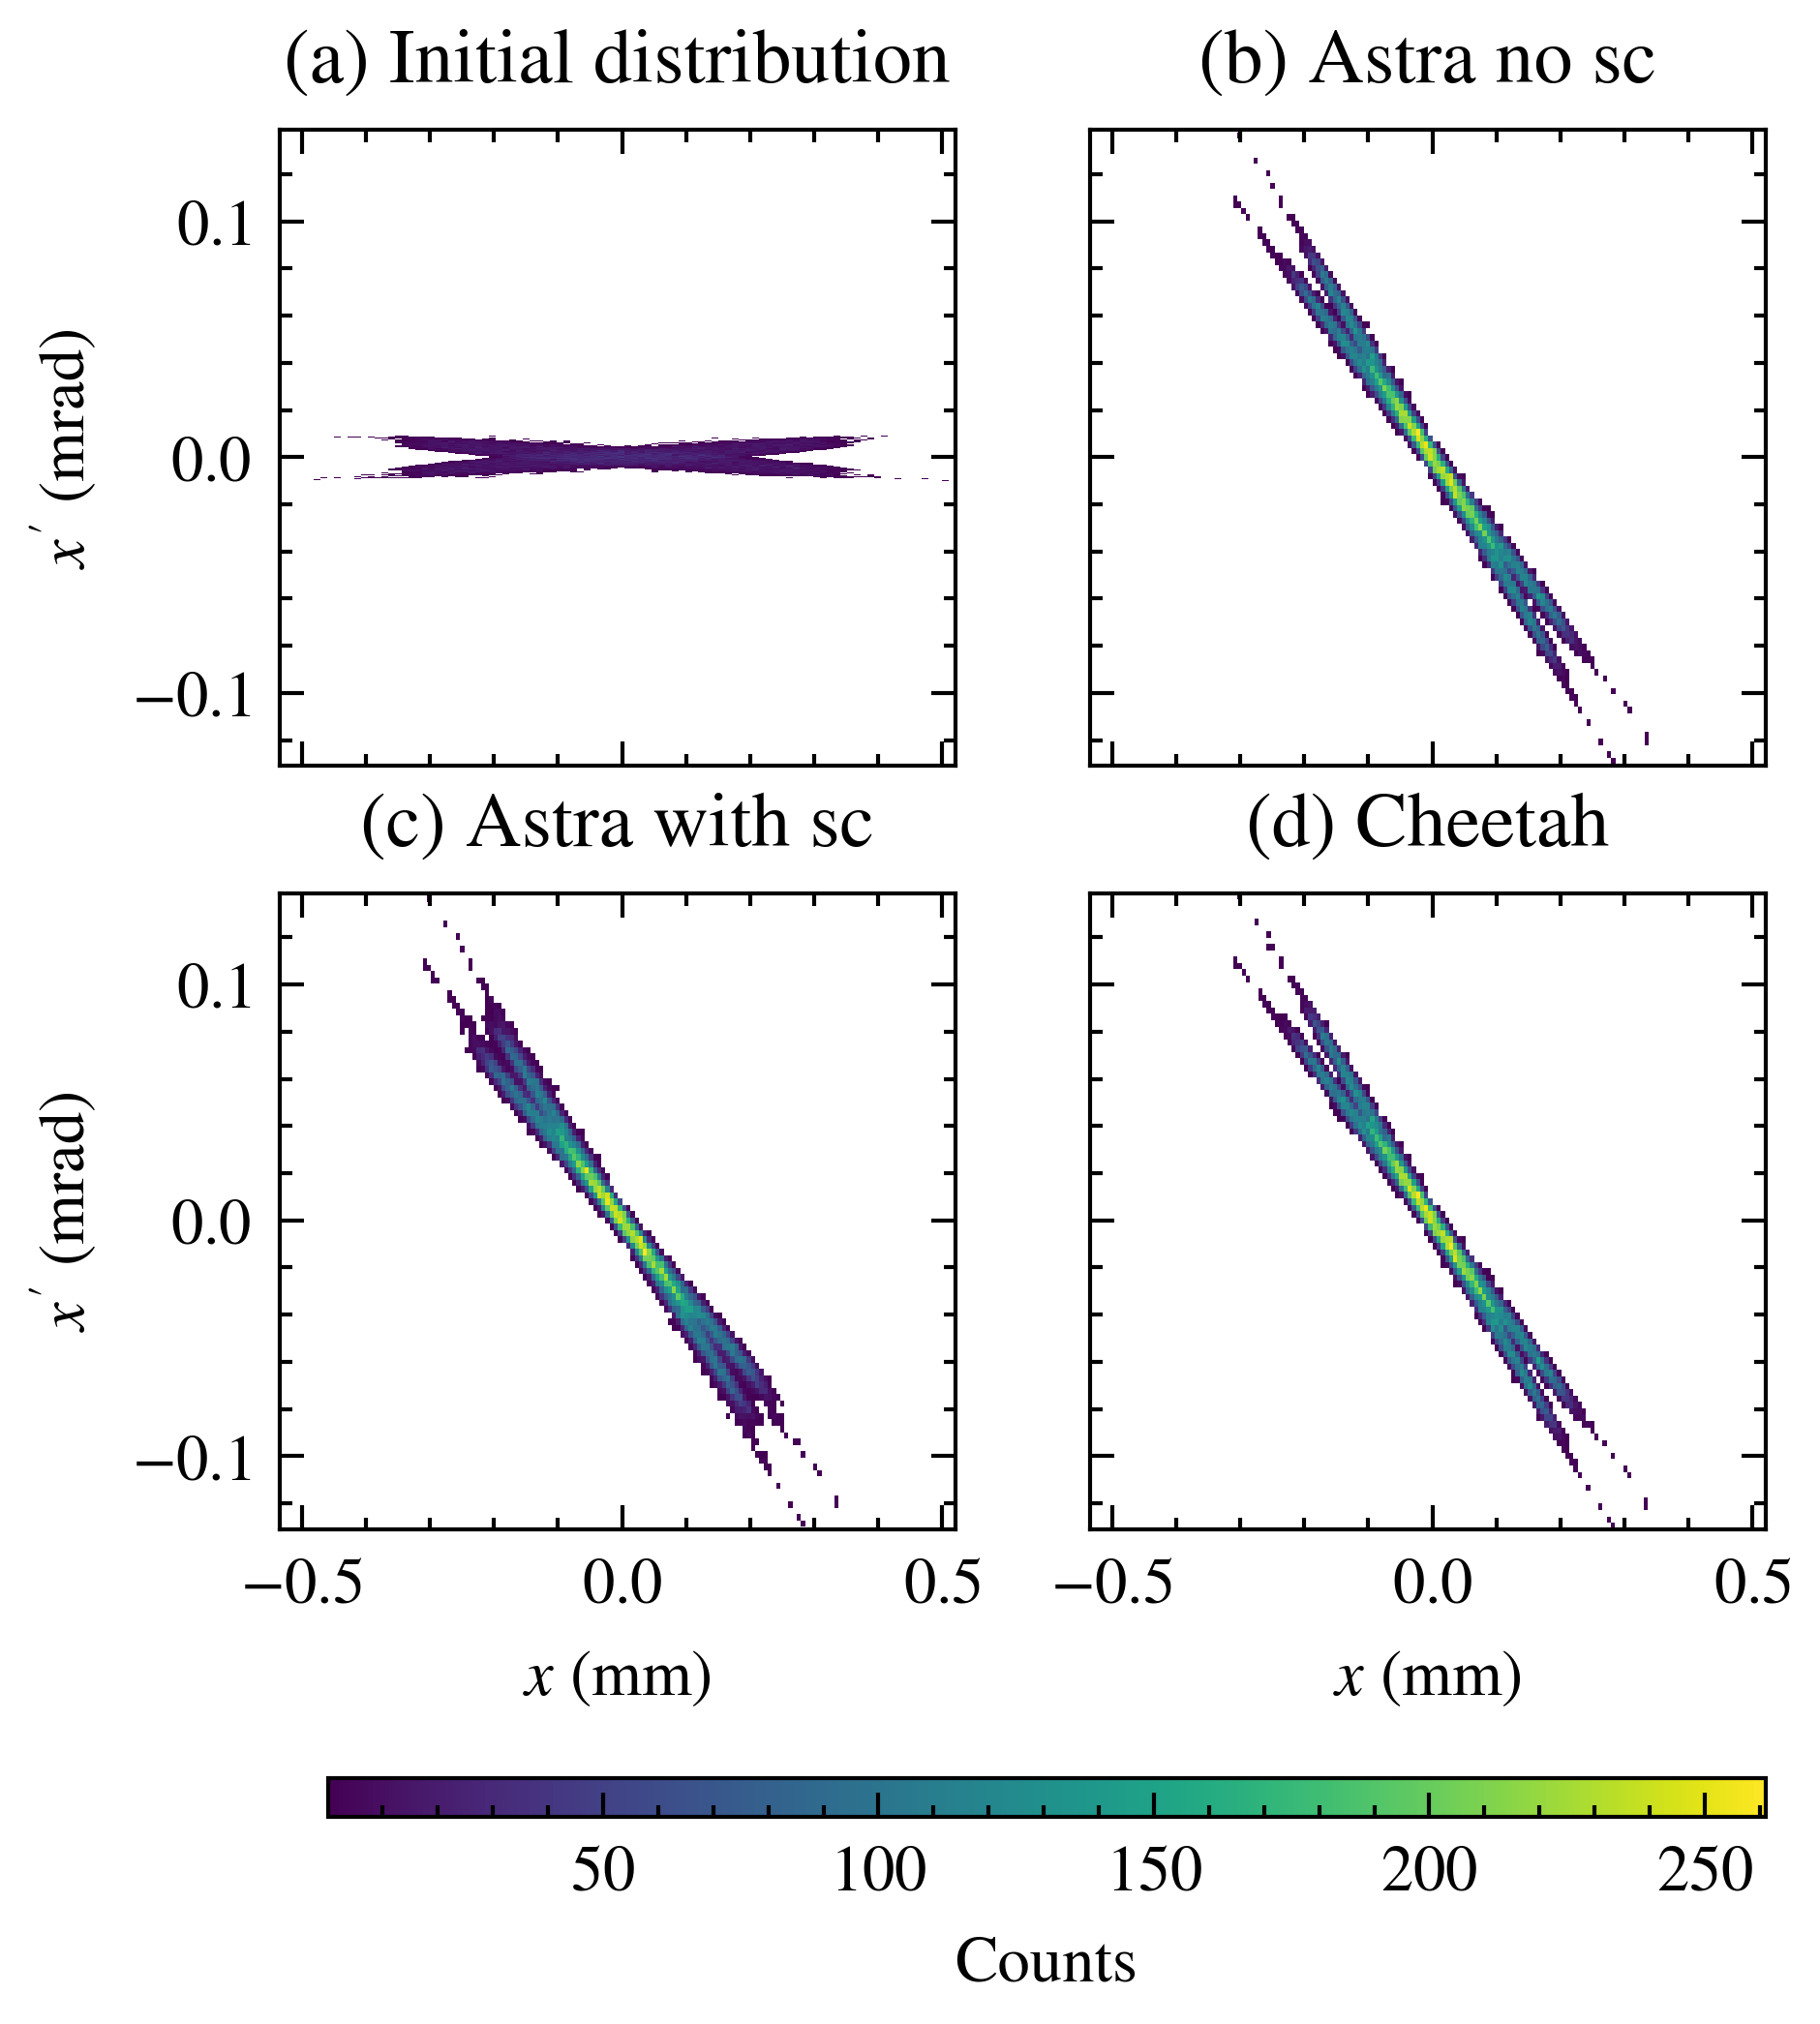

In [234]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(3.3, 3.3))
fig.subplots_adjust(bottom=0.15)
# Set label font size
for ax in axes.flatten():
    ax.tick_params(labelsize=8)

for i, ax in enumerate(axes.flatten()):
    im = ax.pcolormesh(xedges[i], yedges[i], Hs[i], cmap=my_cmap, vmin=vmin, vmax=vmax)
    ax.set_title(["(a) Initial distribution", "(b) Astra no sc", "(c) Astra with sc", "(d) Cheetah"][i])

# Set axis labels 
axes[0, 0].set_ylabel("$x'$ (mrad)", fontsize=8)
axes[1, 0].set_ylabel("$x'$ (mrad)", fontsize=8)
axes[1, 0].set_xlabel("$x$ (mm)", fontsize=8)
axes[1, 1].set_xlabel("$x$ (mm)", fontsize=8)
# Set font size

# create a colorbar horizontal at the bottom
cbar_ax = fig.add_axes([0.15, 0.0, 0.75, 0.02])
cbar_ax.tick_params(labelsize=8)
# Make the colorbar thinner
cbar = fig.colorbar(im, cax=cbar_ax, orientation="horizontal", shrink=0.15)
cbar.set_label("Counts", fontsize=8)
# cbar = fig.colorbar(im, cax=cbar_ax, orientation="horizontal", shrink=0.5)
fig.savefig("phase_space_comparison.pdf", bbox_inches="tight")

In [235]:
# Calculate the relative error
rel_error_x = (cheetah_outbeam.sigma_x - astra_outbeam.sigma_x) / astra_outbeam.sigma_x
rel_error_xp = (cheetah_outbeam.sigma_xp - astra_outbeam.sigma_xp) / astra_outbeam.sigma_xp
print(f"Relative error in x: {rel_error_x * 100:.2f}%")
print(f"Relative error in xp: {rel_error_xp * 100:.2f}%")

Relative error in x: -2.88%
Relative error in xp: 7.49%


In [236]:
# Calculate the relative error without sc
rel_error_x = (cheetah_outbeam.sigma_x - astra_outbeam_nosc.sigma_x) / astra_outbeam_nosc.sigma_x
rel_error_xp = (cheetah_outbeam.sigma_xp - astra_outbeam_nosc.sigma_xp) / astra_outbeam_nosc.sigma_xp
print(f"Relative error in x: {rel_error_x * 100:.2f}%")
print(f"Relative error in xp: {rel_error_xp * 100:.2f}%")

Relative error in x: -0.63%
Relative error in xp: 0.95%
